In [13]:
import matplotlib.pyplot as plt
import os
import json

In [14]:
# TODO: modify work dir in 'expr'
work_dir = 'expr_classroom_schedule_unnetlimit'


In [15]:
source_data = []

for i in range(2):
    source_data_path = os.path.join(work_dir, f'data_record_source_{i}.json')
    with open(source_data_path, 'r') as file:
        source_data.append(json.load(file))

color = [
'#8ECFC9',
'#FFBE7A',
'#FA7F6F',
'#82B0D2',
'#BEB8DC',
'#E7DAD2'
]

In [26]:
transmit1 = [[], []]
service1 = [[], []]
transmit2 = [[], []]
service2 = [[], []]
transmit3 = [[], []]

for i in range(2):
    for key in sorted(source_data[i], key= lambda i:int(i)):
        task = source_data[i][key]
        pipeline = task['pipeline']

        transmit1[i].append(pipeline[0]['execute_data']['transmit_time'])
        service1[i].append(pipeline[0]['execute_data']['service_time'])
        transmit2[i].append(pipeline[1]['execute_data']['transmit_time'])
        service2[i].append(pipeline[1]['execute_data']['service_time'])
        transmit3[i].append(pipeline[2]['execute_data']['transmit_time'])



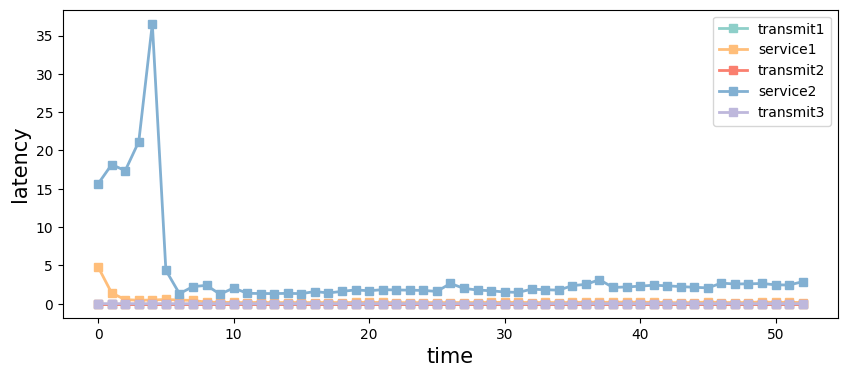

In [32]:
data_source_index= 1
plt.figure(figsize=(10,4))
plt.xlabel('time', fontsize=15)
plt.ylabel('latency', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.plot(transmit1[data_source_index], color=color[0], linewidth=2, marker='s',label=f'transmit1')
plt.plot(service1[data_source_index], color=color[1], linewidth=2, marker='s',label=f'service1')
plt.plot(transmit2[data_source_index], color=color[2], linewidth=2, marker='s',label=f'transmit2')
plt.plot(service2[data_source_index], color=color[3], linewidth=2, marker='s',label=f'service2')
plt.plot(transmit3[data_source_index], color=color[4], linewidth=2, marker='s',label=f'transmit3')

# plt.ylim(0,10)
plt.legend()